In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
status = pd.read_csv('./data/status.csv')
station = pd.read_csv('./data/station.csv')
weather = pd.read_csv('./data/weather.csv')


,id,year,month,day,hour,station_id,bikes_available,predict
1226370,1226370,2015,8,30,18,69,NaN,0
1226371,1226371,2015,8,30,19,69,NaN,0
1226372,1226372,2015,8,30,20,69,NaN,0
1226373,1226373,2015,8,30,21,69,NaN,0
1226374,1226374,2015,8,30,22,69,NaN,0
1226375,1226375,2015,8,30,23,69,NaN,0
1226376,1226376,2015,8,31,0,69,10.0,0
1226377,1226377,2015,8,31,1,69,10.0,0
1226378,1226378,2015,8,31,2,69,10.0,0
1226379,1226379,2015,8,31,3,69,10.0,0


In [86]:
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'])
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date
0,0,2013,9,1,0,0,11.0,0,2013-09-01
1,1,2013,9,1,1,0,11.0,0,2013-09-01
2,2,2013,9,1,2,0,11.0,0,2013-09-01
3,3,2013,9,1,3,0,11.0,0,2013-09-01
4,4,2013,9,1,4,0,11.0,0,2013-09-01


In [87]:
status[status['predict'] == 1]['date'].nunique()


120

In [88]:
station['installation_date'] = pd.to_datetime(station['installation_date'])
print(station['installation_date'].min())
print(station['installation_date'].max())

2013-08-05 00:00:00
2014-04-09 00:00:00


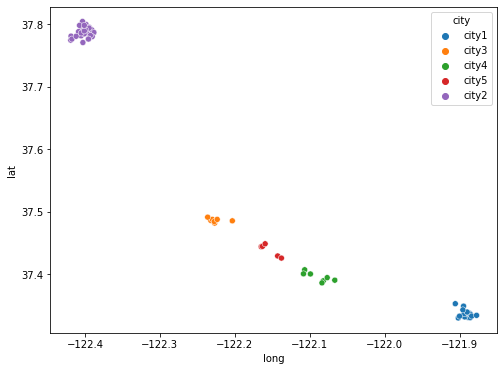

In [89]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='long', y='lat', hue='city', data=station) 
plt.show()

In [90]:
weather['date'] = pd.to_datetime(weather['date'])
print(weather['date'].nunique())

730


In [91]:
status = pd.merge(status, station[['station_id', 'city']], how = 'left')


In [94]:
status = pd.merge(status, weather[['date', 'precipitation']], how = 'left')


In [95]:
status['week_num'] = status['date'].dt.weekday
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation,week_num
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1,0.0,6
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1,0.0,6
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1,0.0,6
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1,0.0,6
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1,0.0,6


In [96]:
t = status.groupby(['station_id', 'date']).first()['bikes_available'].reset_index()
#24回リピートすることでデータのサイズを合わせる
t = pd.DataFrame(np.repeat(t.values, 24, axis=0))
t.columns = ['station_id', 'date', 'bikes_available_at0']
t.head(10)

,station_id,date,bikes_available_at0
0,0,2013-09-01,11
1,0,2013-09-01,11
2,0,2013-09-01,11
3,0,2013-09-01,11
4,0,2013-09-01,11
5,0,2013-09-01,11
6,0,2013-09-01,11
7,0,2013-09-01,11
8,0,2013-09-01,11
9,0,2013-09-01,11


In [98]:
status['bikes_available_at0'] = t['bikes_available_at0']

In [99]:
#city列をcategorical encoderを用いて数値化
cols = ['city']

#encoder = ce.CountEncoder()
#temp_ = encoder.fit_transform(status[cols]).add_prefix("CE_")

# OneHotEncodeしたい列を指定
encoder = ce.OneHotEncoder(cols=cols, handle_unknown='impute')
temp_ = encoder.fit_transform(status[cols]).add_prefix("CE_")

status = pd.concat([status, temp_], axis=1)

In [100]:
train = status[status['date'] < '2014-09-01']
test = status[(status['date'] >= '2014-09-01') & (status['predict'] == 1)]

In [101]:
train = train[train['bikes_available'].notna()]


In [102]:
#使用カラムを限定
train = train[['hour', 'station_id',  'CE_city_1', 'CE_city_2', 'CE_city_3', 'CE_city_4', 'CE_city_5',
               'precipitation', 'week_num',"bikes_available_at0", 'bikes_available']]
test_X = test[['hour', 'station_id',  'CE_city_1', 'CE_city_2', 'CE_city_3', 'CE_city_4', 'CE_city_5',
               'precipitation', 'week_num',"bikes_available_at0"]]

In [103]:
#trainをtrain, validに分割
train_, valid_ = train_test_split(train, test_size=0.3)
#説明変数と目的変数に分離
train_X = train_.drop('bikes_available', axis = 1)
train_y = train_['bikes_available']
valid_X = valid_.drop('bikes_available', axis = 1)
valid_y = valid_['bikes_available']

In [104]:
mean_squared_error(valid_y, valid_X['bikes_available_at0'], squared=False)

3.1043770827823582

In [105]:
#モデリング
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=15, random_state=0)
regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=15, random_state=0)

In [106]:
#validデータに対して予測
val_predict = regr.predict(valid_X)
val_predict

array([ 3.23212818,  6.76568827, 11.35272861, ...,  3.6502015 ,
        7.39789371,  5.17834268])

In [107]:
mean_squared_error(valid_y, val_predict, squared=False)
#2.1

2.117917702291787

In [108]:
test_predict = regr.predict(test_X)


In [109]:
sub_index = status[status['predict'] == 1].index
sub_df = pd.DataFrame(list(zip(sub_index, test_predict)))
sub_df.head()

,0,1
0,8761,14.867157
1,8762,14.863659
2,8763,14.906296
3,8764,14.936230
4,8765,14.970272


In [41]:
#sub_df.to_csv("output/tutorial2.csv",index=False, header=False)

In [42]:
# !signate submit -c 550 output/tutorial2.csv

You have successfully submitted your predictions.We will send you the submission result to your email address.


In [65]:
train_[(train_.station_id == 30) & (train_.week_num == 1)].sort_index()

,hour,station_id,CE_city_1,CE_city_2,CE_city_3,CE_city_4,CE_city_5,precipitation,week_num,bikes_available_at0,bikes_available
525650,2,30,0,0,0,1,0,1.71,1,5,5.0
525651,3,30,0,0,0,1,0,1.71,1,5,6.0
525653,5,30,0,0,0,1,0,1.71,1,5,6.0
525655,7,30,0,0,0,1,0,1.71,1,5,6.0
525656,8,30,0,0,0,1,0,1.71,1,5,6.0
...,...,...,...,...,...,...,...,...,...,...,...
534234,18,30,0,0,0,1,0,0.00,1,5,4.0
534235,19,30,0,0,0,1,0,0.00,1,5,3.0
534236,20,30,0,0,0,1,0,0.00,1,5,3.0
534237,21,30,0,0,0,1,0,0.00,1,5,4.0


In [64]:
valid_[(valid_.station_id == 30) & (valid_.week_num == 1)].sort_index()

,hour,station_id,CE_city_1,CE_city_2,CE_city_3,CE_city_4,CE_city_5,precipitation,week_num,bikes_available_at0,bikes_available
525648,0,30,0,0,0,1,0,1.71,1,5,5.0
525649,1,30,0,0,0,1,0,1.71,1,5,5.0
525652,4,30,0,0,0,1,0,1.71,1,5,6.0
525654,6,30,0,0,0,1,0,1.71,1,5,6.0
525658,10,30,0,0,0,1,0,1.71,1,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...
534227,11,30,0,0,0,1,0,0.00,1,5,3.0
534228,12,30,0,0,0,1,0,0.00,1,5,4.0
534229,13,30,0,0,0,1,0,0.00,1,5,4.0
534230,14,30,0,0,0,1,0,0.00,1,5,4.0


In [111]:
ind = status["bikes_available"] == status['bikes_available_at0']

In [115]:
status[ind]

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation,week_num,bikes_available_at0,CE_city_1,CE_city_2,CE_city_3,CE_city_4,CE_city_5
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226379,1226379,2015,8,31,3,69,10.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
1226380,1226380,2015,8,31,4,69,10.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
1226381,1226381,2015,8,31,5,69,10.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
1226382,1226382,2015,8,31,6,69,10.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0


In [114]:
status[~ind]

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation,week_num,bikes_available_at0,CE_city_1,CE_city_2,CE_city_3,CE_city_4,CE_city_5
12,12,2013,9,1,12,0,10.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
13,13,2013,9,1,13,0,9.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
14,14,2013,9,1,14,0,7.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
15,15,2013,9,1,15,0,6.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
16,16,2013,9,1,16,0,10.0,0,2013-09-01,city1,0.0,6,11,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31,city1,0.0,0,10,1,0,0,0,0
